In [1]:
# pip3 install pandas-datareader
from pandas_datareader import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
apple = data.DataReader('AAPL'
                         , 'yahoo'
                         , start = '12/31/2008'
                        ).reset_index()
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-12-31,3.133571,3.047857,3.070357,3.048214,6.075412e+08,2.634081
1,2009-01-02,3.251429,3.041429,3.067143,3.241071,7.460152e+08,2.800736
2,2009-01-05,3.435000,3.311071,3.327500,3.377857,1.181608e+09,2.918938
3,2009-01-06,3.470357,3.299643,3.426786,3.322143,1.289310e+09,2.870794
4,2009-01-07,3.303571,3.223572,3.278929,3.250357,7.530488e+08,2.808761


In [4]:
apple = apple[['Date', 'Close']]
apple.head()

,Date,Close
0,2008-12-31,3.048214
1,2009-01-02,3.241071
2,2009-01-05,3.377857
3,2009-01-06,3.322143
4,2009-01-07,3.250357


In [5]:
apple['Previous_Close'] = apple.Close.shift(1)
apple.head()

,Date,Close,Previous_Close
0,2008-12-31,3.048214,NaN
1,2009-01-02,3.241071,3.048214
2,2009-01-05,3.377857,3.241071
3,2009-01-06,3.322143,3.377857
4,2009-01-07,3.250357,3.322143


In [6]:
apple = apple.iloc[1:]
apple.head()

,Date,Close,Previous_Close
1,2009-01-02,3.241071,3.048214
2,2009-01-05,3.377857,3.241071
3,2009-01-06,3.322143,3.377857
4,2009-01-07,3.250357,3.322143
5,2009-01-08,3.310714,3.250357


In [7]:
# Calculate Periodic Daily Return
apple['PDR'] = np.log(apple.Close / apple.Previous_Close)
apple.head()

,Date,Close,Previous_Close,PDR
1,2009-01-02,3.241071,3.048214,0.061348
2,2009-01-05,3.377857,3.241071,0.041338
3,2009-01-06,3.322143,3.377857,-0.016632
4,2009-01-07,3.250357,3.322143,-0.021845
5,2009-01-08,3.310714,3.250357,0.018399


In [8]:
# Test np.log is ln(x)
np.log(np.exp(1))

1.0

In [9]:
# Calculate Drift 
Drift = apple.PDR.mean() - apple.PDR.var() / 2
# Drift = 0 # can use zero in this instance
Drift

0.0010592837000789896

In [10]:
# Import random
import random
# Test list of 10 random numbers
[random.random() for _ in range(10)]

[0.5496703235372434,
 0.5283422181759949,
 0.2133801013690234,
 0.9474038514225352,
 0.8535720629667128,
 0.4539999312185463,
 0.5470503745320296,
 0.32913294410648997,
 0.6109936925162064,
 0.6085765375724359]

In [11]:
# Make Monte Carlo Predictions
from scipy import stats
sigma = apple.PDR.std()
apple.MC_Pred = 0
apple.loc[1, 'MC_Pred'] = apple.loc[1, 'Close'] * np.exp(Drift + sigma * stats.norm.ppf(random.random(), 0, 1))
for i in range(2, len(apple)+1):
    apple.loc[i, 'MC_Pred'] = apple.loc[i-1, 'MC_Pred'] * np.exp(Drift + sigma * stats.norm.ppf(random.random(), 0, 1))
apple.head()

,Date,Close,Previous_Close,PDR,MC_Pred
1,2009-01-02,3.241071,3.048214,0.061348,3.281193
2,2009-01-05,3.377857,3.241071,0.041338,3.278176
3,2009-01-06,3.322143,3.377857,-0.016632,3.241905
4,2009-01-07,3.250357,3.322143,-0.021845,3.244604
5,2009-01-08,3.310714,3.250357,0.018399,3.246304


In [12]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 1 to 2984
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2984 non-null   datetime64[ns]
 1   Close           2984 non-null   float64       
 2   Previous_Close  2984 non-null   float64       
 3   PDR             2984 non-null   float64       
 4   MC_Pred         2984 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 116.7 KB


In [13]:
len(apple['MC_Pred'])

2984

In [14]:
apple.MC_Pred = apple['MC_Pred']

In [15]:
len(apple.MC_Pred)

2984

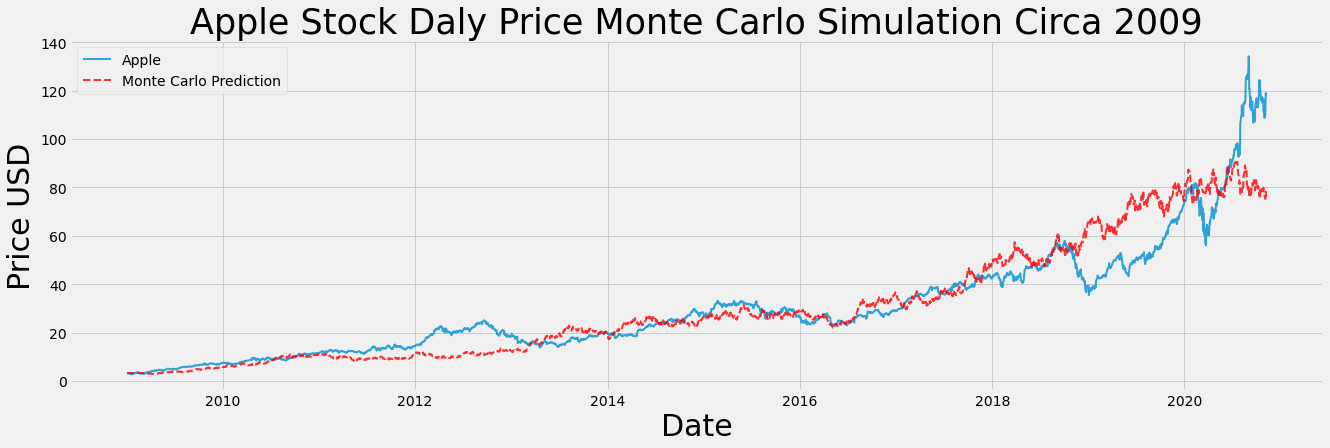

In [16]:
plt.figure(figsize = (20,6))
plt.plot(apple.Date
         , apple.Close
         , label = 'Apple'
         , alpha = 0.8
         , linewidth = 2
        )
plt.plot(apple.Date
         , apple.MC_Pred
         , 'r--'
         , label = 'Monte Carlo Prediction'
         , linewidth = 2
         , alpha = 0.8
        )
plt.legend()
plt.title('Apple Stock Daly Price Monte Carlo Simulation Circa 2009'
          , fontsize = 35
         )
plt.xlabel('Date'
           , fontsize = 30
          )
plt.ylabel('Price USD'
           , fontsize = 30
          );

In [17]:
# Make a function
def monte_stocks(ticker, date):
    pass